# Derivadas

## Diferencia hacia adelante (Forward Difference)

La expansión en series de Taylor de $f(x+h)$ está determinada por la siguiente expresión: $$f(x + h) = f(x) + \frac{df}{dx}h + \frac{1}{2!}\frac{d^2 f}{dx^2}h^2 + \cdots .$$ Si asumimos que $h$ es lo suficientemente pequeño como para que $h^2 \approx 0$ entonces: $$f(x+h) \approx f(x) + h \frac{df}{dx},$$ lo cual implica que: $$f'(x) \approx \frac{f(x+h) - f(x)}{h},$$ con $f'(x) = \frac{df}{dx}.$ Si usamos esta expresión y la queremos traducir en términos de listas o arrays, debemos hacer los siguientes reemplazos: $$f(x+h) \to f[i+1]$$ $$f(x) = f[i]$$ y $$f'(x) \to f\_prima[i].$$ De esta forma ya podemos definir una primera aproximación a lo que es la derivada en términos de código en Python. En particular, esta forma de aproximar la derivada se conoce como **Forward Difference** o diferencia hacia adelante, dado que la derivada depende de la función $f$ en el futuro, $f(x+h)$, y en el momento actual, $f(x)$. En términos de listas o arrays de Python: $$f\_prima[i] = (f[i+1] - f[i])/(h).$$ Hay una limitante para esta expresión de la derivada en Python y es que si en principio $i=0,1,2,...,N$, entonces el término $f\_prima[N]$ no está bien definido, ya que el término $f[N+1]$ dentro de la derivada no existe. Así pues nos tenemos que limitar a valores de $i=0,1,2,...,N-1$, o sea, desde el primero hasta el penúltimo con la derivada. Miremos cómo se implementa:

La diferencia entre los dos metodos usados para encontrar la derivada forward es:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

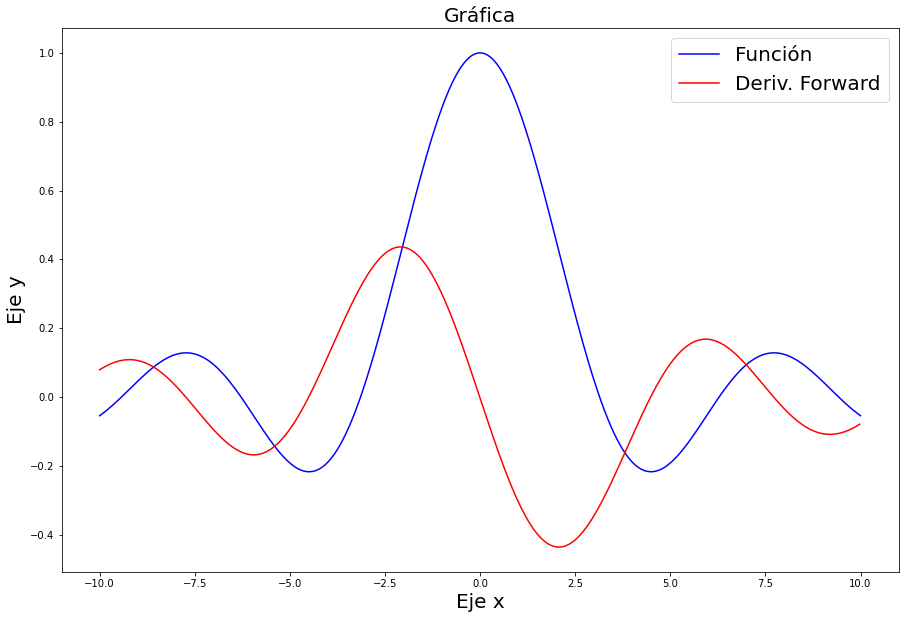

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 

def funcion(x): # Creamos una función, que será sin(x)/x
    return np.sin(x)/x

def funcion_prima(x): # Creamos una función que nos permite hallar la verdadera derivada. Más adelante la usaremos
    return (x*np.cos(x) - np.sin(x))/(x**2)

def funcion_2prima(x): # Creamos una función que nos permite hallar la verdadera segunda derivada. Más adelante la usaremos
    return -((x**2 - 2)*np.sin(x) + 2*x*np.cos(x))/(x**3)

x = np.linspace(-10,10,1000) # Creamos nuestro eje x,que irá de -10 a 10 y tendrá 1000 valores
f = funcion(x)

h = x[1] - x[0] # Definimos h como un valor bastante pequeño, en este caso la separación entre un valor de x y el siguiente. O sea, h = Delta x. (Nota: x[0]=-10)

############################# Primera forma de hallar esta derivada forward ##########################################################

f_prima_forward = (f[1:] - f[:-1])/(h) # Definimos la derivada según la expresión que se derivó anteriormente. Definiendo la derivada de esta forma no hay necesidad de hallar la derivada para cada valor de i con un for (por ejemplo), sino que se implementa directamente.  El término que corresponde a f[i+1] se escribe como f[1:], ya que para i=0 este término será f[1] y para i=N-1 este término será f[N-1+1] = f[N], o sea que estamos tomando los valores de f desde f[1] hasta f[N] (el último término). El término que corresponde con f[i] lo escribimos como f[:-1], ya que para i=0 este término será f[0] y para i=N-1 este término será f[N-1], o sea que estamos tomando los valores de f desde f[0] (el primero) hasta f[N-1] (el penúltimo). Recordar que si tenemos f[a:b] estamos tomando la lista o array f[i] para valores desde i=a hasta i=b-1

############################# Segunda forma de hallar esta derivada forward ##########################################################

f_prima_forward_2 = [] # También puedo crear el mismo array f_prima_forward con un for. Lo empezamos creando una lsita vacía que se irá llenando poco a poco

for i in range(0,len(x)-1): # La razón del porqué len(x)-1 se usa es porque ya que los valores de i van desde i=0 hasta el penúltimo (i=N-1)
    f_prima_forward_2.append((f[i+1] - f[i])/(h))

f_prima_forward_2 = np.array(f_prima_forward_2) # Convertimos la lista en array

#######################################################################################################################################

# Miro si hay alguna diferencia entre los metodos que usé para calcular la derivada forward...
print("La diferencia entre los dos metodos usados para encontrar la derivada forward es:")
print(f_prima_forward - f_prima_forward_2) # Resta entre los valores encontrados por los 2 métodos. Como da lo mismo, da 0 todo
print("\n")

#Grafico...
figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x[:-1], f_prima_forward, color="red", label="Deriv. Forward") # Graficamos la derivada. Notar que no estamos graficando x y f_prima_forward sino x[:-1] y f_prima_forward ya que los valores de i van desde i=0 hasta el penúltimo (i=N-1), entonces debemos graficar con x[:-1] (del primero al penúltimo)
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

## Diferencia hacia atrás (Backward Difference)

La otra forma de calcular la derivada es la **Backward Difference** o diferencia hacia atrás. La fórmula de la derivada en este caso es: $$f\_prima[i] = (f[i] - f[i-1])/(h).$$ En este caso los posibles valores de $i$ serán $i=1,...,N$, dado que el término f\_prima\[0\] no está bien definido (Hagamos de cuenta que olvidamos el hecho de que Python permite usar índices negativos...). La implementación de este tipo de derivada se muestra a continuación:

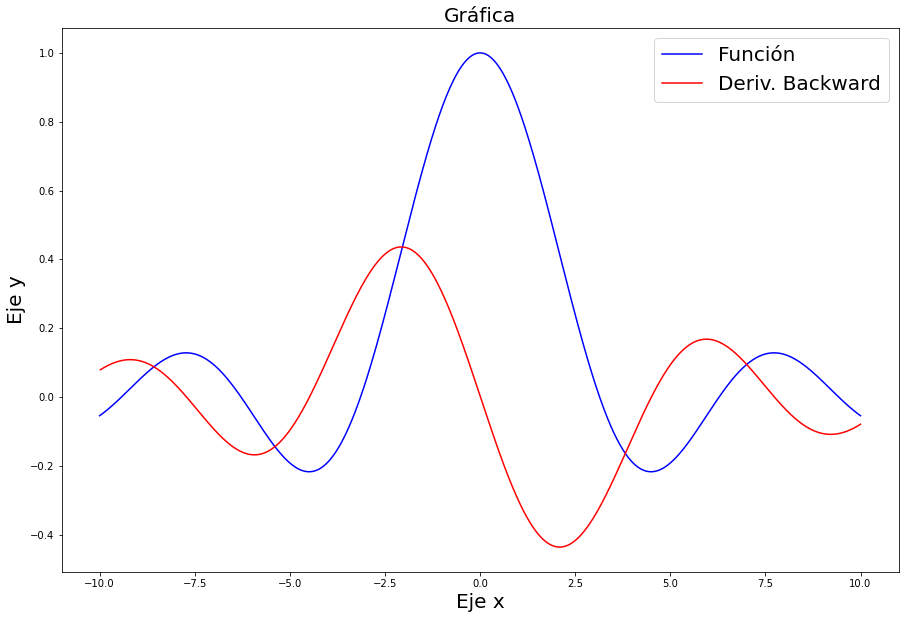

In [41]:
f_prima_backward = (f[1:] - f[:-1])/(h) # Definimos la derivada según la expresión que se derivó anteriormente. Definiendo la derivada de esta forma no hay necesidad de hallar la derivada para cada valor de i con un for (por ejemplo), sino que se implementa directamente.  El término que corresponde a f[i] se escribe como f[1:], ya que para i=1 este término será f[1] y para i=N este término será f[N], o sea que estamos tomando los valores de f desde f[1] hasta f[N] (el último término). El término que corresponde con f[i-1] lo escribimos como f[:-1], ya que para i=1 este término será f[0] y para i=N este término será f[N-1], o sea que estamos tomando los valores de f desde f[0] (el primero) hasta f[N-1] (el penúltimo). Recordar que si tenemos f[a:b] estamos tomando la lista o array f[i] para valores desde i=a hasta i=b-1

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x[1:], f_prima_backward, color="red", label="Deriv. Backward") # Graficamos la derivada. Notar que no estamos graficando x y f_prima_backward sino x[1:] y f_prima_backward ya que los valores de i van desde i=1 hasta el último (i=N), entonces debemos graficar con x[1:] (del segundo (i=1) al último)
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

## Diferencia Central (Central Difference)

Podemos tener aún una mayor precisión usando la **Central Difference** o diferencia central, que no es más que un promedio de las dos formas anteriores de calcular la derivada. Como: $$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$ y $$f'(x) \approx \frac{f(x) - f(x-h)}{h}.$$ Sumando estas dos ecuaciones llegamos a que $$2f'(x) = \frac{f(x+h) - f(x-h)}{h}$$ o también: $$f'(x) = \frac{f(x+h) - f(x-h)}{2h}.$$ En términos de listas o arrays podemos escribir esto como: $$f\_prima[i] = (f[i+1] - f[i-1])/(2*h).$$ Es importante notar que esta derivada no está bien definida para i=0 y para i=N (tiene las restricciones de la diferencia hacia adelante y la diferencia hacia atrás juntas), de forma que los valores de i serán i=1,2,...,N-1. Miremos cómo se implementa:

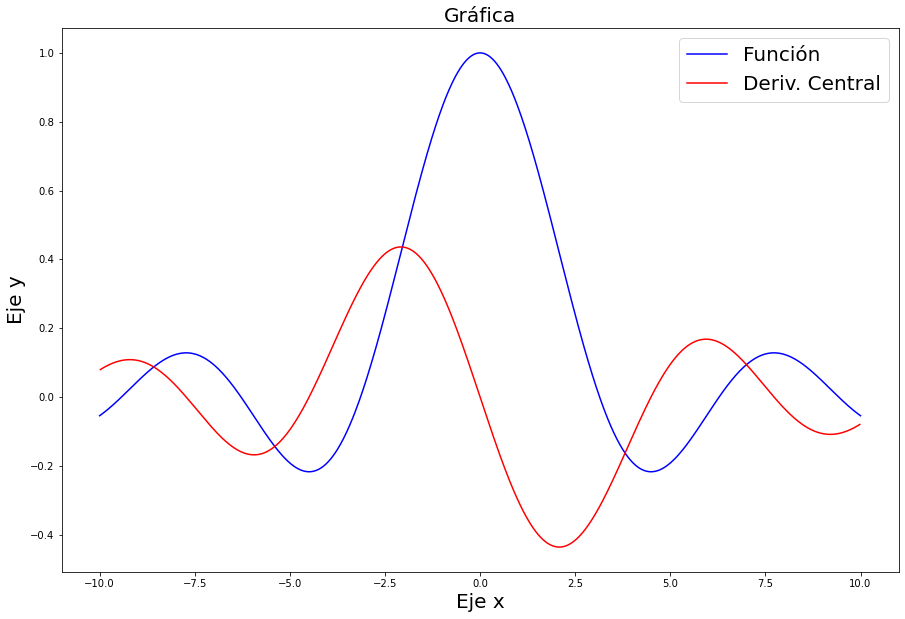

In [42]:
f_prima_central = (f[2:] - f[:-2])/(2*h) # Definimos la derivada según la expresión que se derivó anteriormente. Definiendo la derivada de esta forma no hay necesidad de hallar la derivada para cada valor de i con un for (por ejemplo), sino que se implementa directamente.  El término que corresponde a f[i+1] se escribe como f[2:], ya que para i=1 este término será f[2] y para i=N-1 este término será f[N], o sea que estamos tomando los valores de f desde f[2] hasta f[N] (el último término). El término que corresponde con f[i-1] lo escribimos como f[:-2], ya que para i=1 este término será f[0] y para i=N-1 este término será f[N-2], o sea que estamos tomando los valores de f desde f[0] (el primero) hasta f[N-2] (el antepenúltimo). Recordar que si tenemos f[a:b] estamos tomando la lista o array f[i] para valores desde i=a hasta i=b-1

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x[1:-1], f_prima_central, color="red", label="Deriv. Central") # Graficamos la derivada. Notar que no estamos graficando x y f_prima_central sino x[1:-1] y f_prima_central ya que los valores de i van desde i=1 hasta el penúltimo (i=N-1), entonces debemos graficar con x[1:-1] (del segundo (i=1) al penúltimo)
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Comparemos ahora las derivadas que encontramos con el valor real de la derivada:

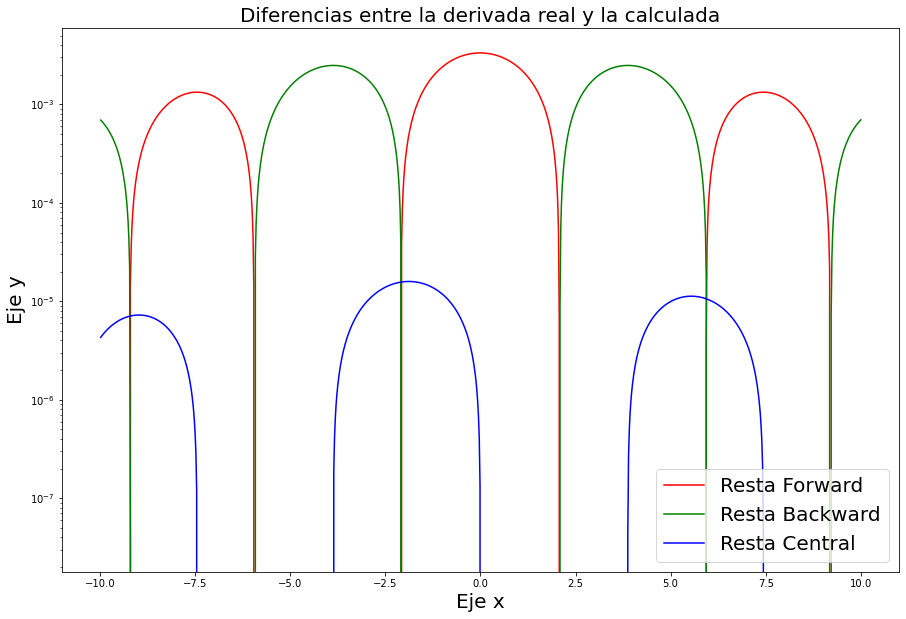

In [43]:
resta_forward = funcion_prima(x[:-1]) - f_prima_forward # Encontramos qué diferencia hay entre el valor real de la derivada y la derivada con forward difference. Se usó x[:-1] por las razones expuestas en la sección de forward difference
resta_backward = funcion_prima(x[1:]) - f_prima_backward # Encontramos qué diferencia hay entre el valor real de la derivada y la derivada con backward difference. Se usó x[1:] por las razones expuestas en la sección de backward difference
resta_central = funcion_prima(x[1:-1]) - f_prima_central # Encontramos qué diferencia hay entre el valor real de la derivada y la derivada con central difference. Se usó x[1:-1] por las razones expuestas en la sección de central difference


figure = plt.figure(figsize=(15,10))
plt.plot(x[:-1],resta_forward,color="red", label="Resta Forward") 
plt.plot(x[1:],resta_backward,color="green", label="Resta Backward") 
plt.plot(x[1:-1],resta_central,color="blue", label="Resta Central") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Diferencias entre la derivada real y la calculada", fontsize=20)
plt.yscale("log") # La escala logaritmica en este caso nos permite ver más o menos en qué orden de magnitud están las restas de los valores reales y las derivadas calculadas numéricamente.  
plt.legend(fontsize=20)
plt.show()

Como se observa en la gráfica anterior, en el caso de la Forward Difference y la Backward Difference, la diferencia entre el valor real y el calculado se encuentra cerca a los $10^{-3}$, mientras que en el caso de la Central Difference la diferencia es mucho menos, del orden de $10^{-5}$, mostrando que la Central Difference es el mejor de los métodos mostrados con anterioridad.

## Segunda derivada 

Tomemos como definición de derivada la de diferencia central, que demostró ser la que más se acerca a la derivada real. Esto quiere decir que: $$f'(x) = \frac{f(x+h) - f(x-h)}{2h}.$$ Ahora bien, la segunda derivada es: $$\frac{d^2 f}{dx^2} = f''(x) = \frac{f'(x+h) - f'(x-h)}{2h}.$$ Como $$f'(x+h) = \frac{f((x+h)+h) - f((x+h)-h)}{2h} = \frac{f(x+2h) - f(x)}{2h}$$ y $$f'(x-h) = \frac{f((x-h)+h) - f((x-h)-h)}{2h} = \frac{f(x) - f(x-2h)}{2h},$$ entonces: $$f''(x) = \frac{\frac{f(x+2h) - f(x)}{2h} - \frac{f(x) - f(x-2h)}{2h}}{2h} = \frac{f(x+2h) - 2f(x) + f(x-2h)}{4h^2}.$$ En términos de listas o arrays, la segunda derivada se puede escribir como: $$f\_2prima[i] = (f[i+2] - 2*f[i] + f(i-2))/(4*(h^{**}2)).$$ Para este caso la segunda derivada no está definida para i=0, i=1, i=N-1 e i=N, de forma que los valores posibles de i son i=2,3,4,...,N-2.

Miremos cómo se implementa:

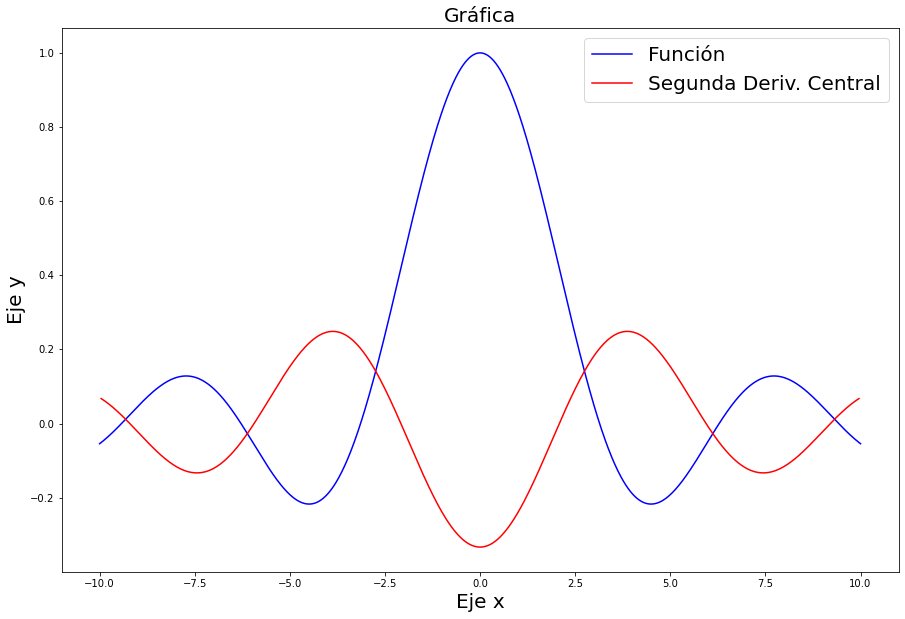

In [44]:
f_2prima_central = (f[4:] - 2*f[2:-2] + f[:-4])/(4*h**2) # Definimos la segunda  derivada según la expresión que se derivó anteriormente.  El término que corresponde a f[i+2] se escribe como f[4:], ya que para i=2 este término será f[4] y para i=N-2 este término será f[N], o sea que estamos tomando los valores de f desde f[4] hasta f[N] (el último término). El término que corresponde con f[i] lo escribimos como f[2:-2], ya que para i=2 este término será f[2] y para i=N-2 este término será f[N-2], o sea que estamos tomando los valores de f desde f[2] (el tercero) hasta f[N-2] (el antepenúltimo). El término que corresponde con f[i-2] lo escribimos como f[:-4], ya que para i=2 este término será f[0] y para i=N-2 este término será f[N-4], o sea que estamos tomando los valores de f desde f[0] (el primero) hasta f[N-4] .Recordar que si tenemos f[a:b] estamos tomando la lista o array f[i] para valores desde i=a hasta i=b-1

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x[2:-2], f_2prima_central, color="red", label="Segunda Deriv. Central") # Graficamos la derivada. Notar que no estamos graficando x y f_2prima_central sino x[2:-2] y f_2prima_central ya que los valores de i van desde i=2 hasta el penúltimo (i=N-2), entonces debemos graficar con x[2:-2] (del tercero (i=1) al antepenúltimo)
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Miremos la diferencia entre la segunda derivada real y la segunda derivada numérica:

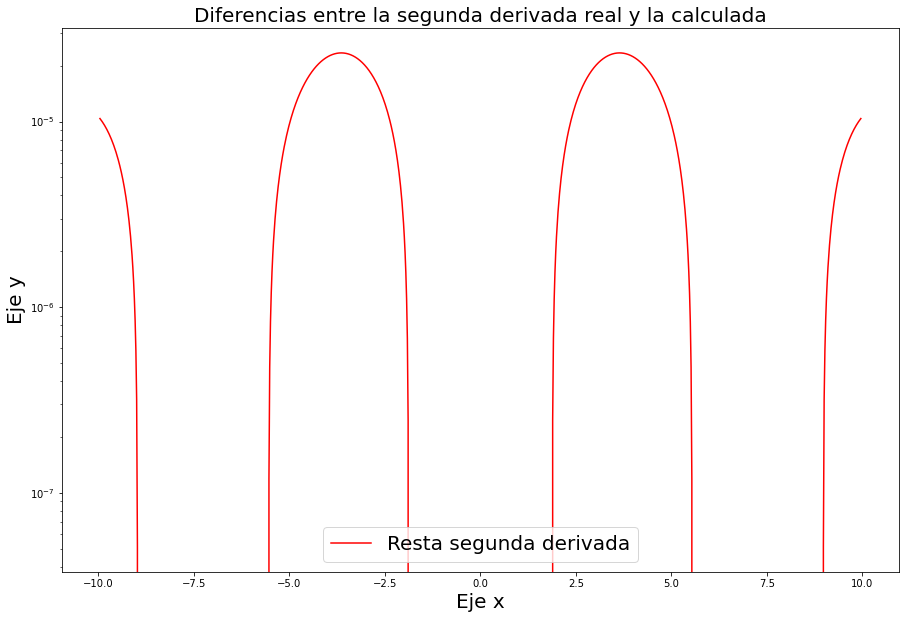

In [45]:
resta_2central = funcion_2prima(x[2:-2]) - f_2prima_central # Miramos la diferencia de la derivada verdadera y la calculada numéricamente 

figure = plt.figure(figsize=(15,10))
plt.plot(x[2:-2],resta_2central,color="red", label="Resta segunda derivada") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Diferencias entre la segunda derivada real y la calculada", fontsize=20)
plt.yscale("log") # La escala logaritmica en este caso nos permite ver más o menos en qué orden de magnitud están las restas de los valores reales y las derivadas calculadas numéricamente.  
plt.legend(fontsize=20)
plt.show()

Se observa que las diferencias entre la segunda derivada real y la calculada numéricamente se mantienen del orden de $10^{-5}$. Son valores muy cercanos!

## Derivada n-esima:

A partir de la definición de la derivada con diferencia central podemos contruir un método iterativo que nos permita hallar la derivada n-ésima de la función que queremos. Este método se puede construir de la siguiente forma:

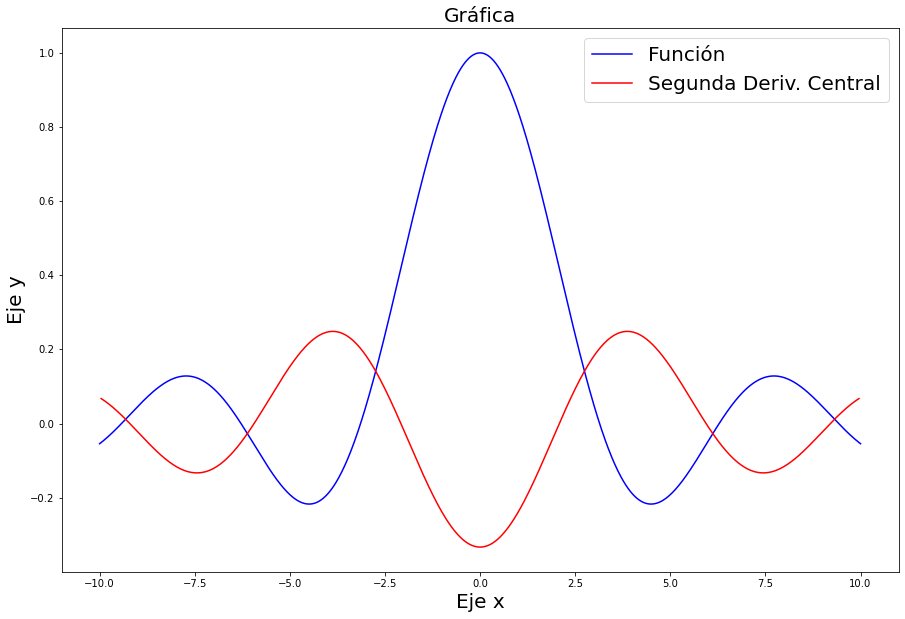

In [46]:
def derivada_central(x,f): # Creamos una función que haga la derivada central y nos devuelva como argumentos el array de valores x en el rango apropiado (ver porqué es apropiado en la parte donde se explica la diferencia central) y el array de la derivada de la función
    h = x[1] - x[0]
    f_prima_central = (f[2:] - f[:-2])/(2*h)
    x_nuevo = x[1:-1]
    return x_nuevo, f_prima_central

def derivada_n_esima(x,f,n): # Creamos una función que hará la derivada n veces
    while(n > 0): # Podemos usar un bucle while para cumplir con ese objetivo. Mientras n sea mayor a cero...
        x_nuevo, f_nprima = derivada_central(x,f) # Realizamos la derivada...
        x = x_nuevo# Como tenemos pensado volver a hacer la derivada en la próxima iteración del bucle, debemos hacer el remplazo de x -> x_nuevo y f->f_nprima, de tal forma que en la siguiente iteración no derivemos f sino f_nprima
        f = f_nprima   
        n = n - 1 # Reducimos en uno el valor de n al final del bucle. Con esto nos aseguramos de que el número de iteraciones del bucle sea el correcto. Por ejemplo, si n=2, entonces el while tendrá 2 iteraciones antes de que n = 0 y así se pare el bucle.

    return  x_nuevo, f_nprima # Devolvemos los arrays x (en el rango apropiado) y f_nprima que representa la derivada n-ésima

x_nuevo, f_2prima_nuevo = derivada_n_esima(x,f,2) # Obtenemos los valores de x y la segunda derivada de f

# Graficamos...
figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x_nuevo, f_2prima_nuevo, color="red", label="Segunda Deriv. Central") # Graficamos la derivada. Notar que no estamos graficando x y f_2prima_central sino x[2:-2] y f_2prima_central ya que los valores de i van desde i=2 hasta el penúltimo (i=N-2), entonces debemos graficar con x[2:-2] (del tercero (i=1) al antepenúltimo)
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Miremos qué tanto difiere esta segunda derivada central de la que encontramos con la fórmula directamente:

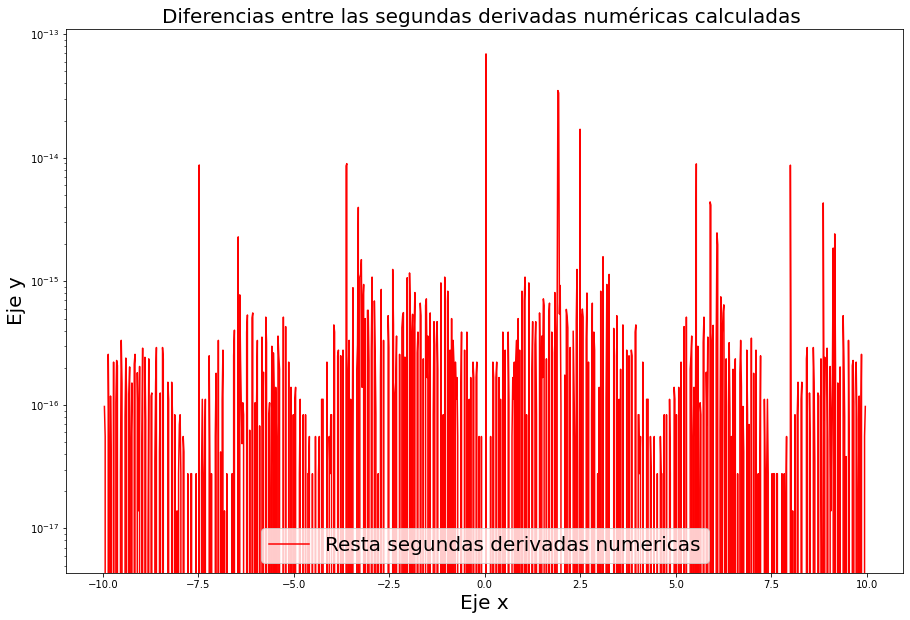

In [47]:
resta_segundas_derivadas_numericas = f_2prima_central - f_2prima_nuevo

figure = plt.figure(figsize=(15,10))
plt.plot(x_nuevo,resta_segundas_derivadas_numericas,color="red", label="Resta segundas derivadas numericas") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Diferencias entre las segundas derivadas numéricas calculadas ", fontsize=20)
plt.yscale("log") 
plt.legend(fontsize=20)
plt.show()

Como vemos, las dos derivadas, aunque en teoría deberían ser iguales, difieren por mucho en un orden de $10^{-13}$, mostrando que aunque no son iguales los valores encontrados, son bastante cercanos. Así que este método iterativo pódría ser usado para encontrar derivadas de orden superior, aunque si el orden de la derivada es lo suficientemente grande (dependiendo del caso) es muy probable que se presenten problemas en la estabilidad numérica de los resultados y se obtenga algo totalmente distinto a lo que debería ser en teoría.  

## Formas menos "manuales" de encontrar la derivada

Python provee algunos métodos extra para poder calcular derivadas numéricamente a través de librerías como scipy y numpy. A continuación se mostrarán:

### Scipy:

Para derivar con scipy hay que usar la clase derivative, como se muestra a continuación:

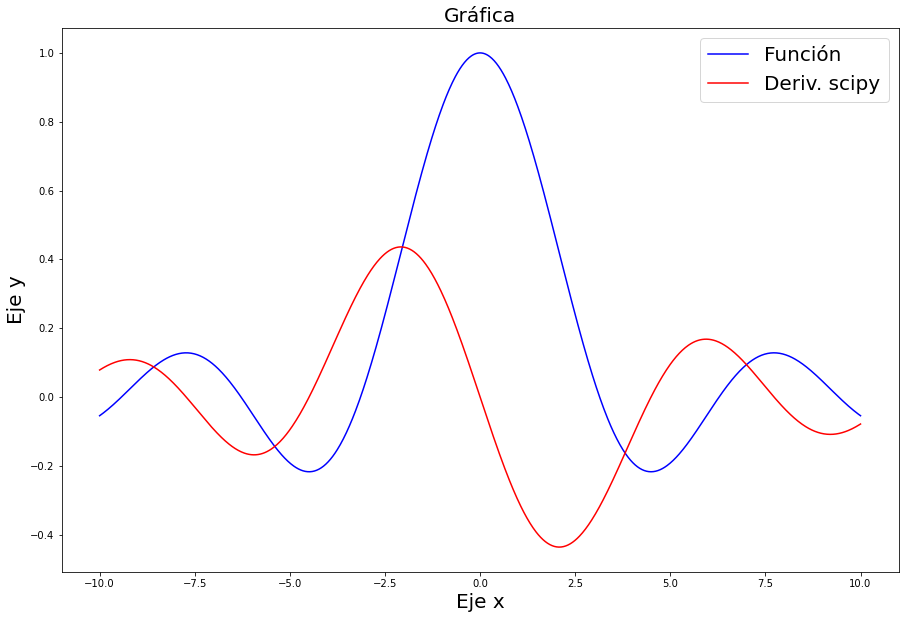

In [48]:
from scipy.misc import derivative # Importamos la clase derivative

f_prima_scipy = derivative(funcion, x, dx=1e-7, n=1) # Usamos derivative(). Toma como argumentos una función, un valor específico de x o un array con valores, el valor de h=dx y el orden de la derivada (n). La función tomada es la declarada al principio de este cuaderno, al igual que el valor del array x. El valor de dx se tomó arbitrariamente como un número bastante pequeño. Sin embargo un valor de dx lo bastante pequeño puede provocar errores. 

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x,f_prima_scipy, color="red", label="Deriv. scipy") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Miremos qué tanto difiere esta derivada numérica encontrada con Scipy de la real:

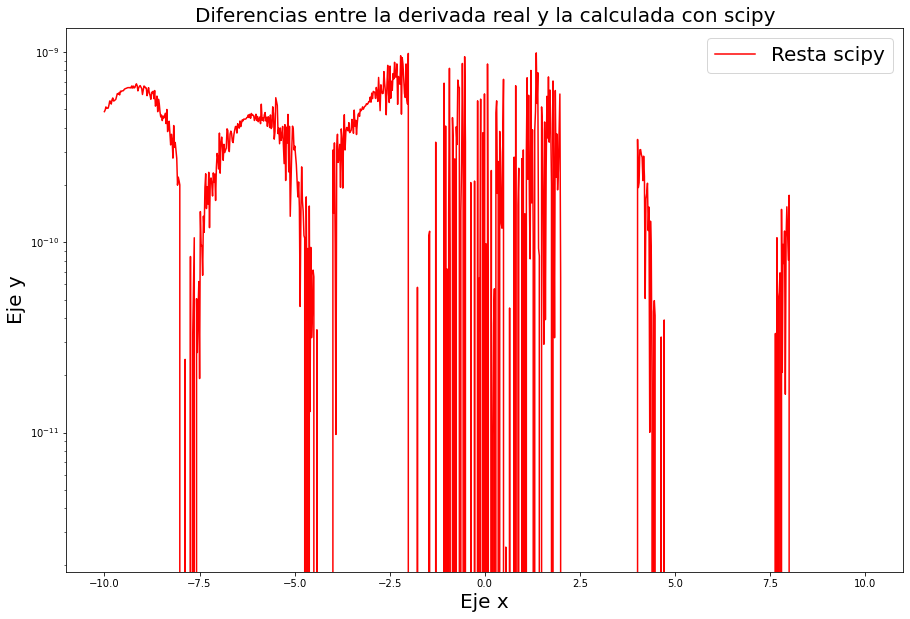

In [49]:
resta_scipy = funcion_prima(x) - f_prima_scipy # Encontramos la diferencia entre la derivada real y la calculada con scipy


figure = plt.figure(figsize=(15,10))
plt.plot(x,resta_scipy,color="red", label="Resta scipy") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Diferencias entre la derivada real y la calculada con scipy", fontsize=20)
plt.yscale("log") # La escala logaritmica en este caso nos permite ver más o menos en qué orden de magnitud están las restas de los valores reales y las derivadas calculadas numéricamente.  
plt.legend(fontsize=20)
plt.show()

En este caso el máximo de la diferencia está alrededor de $10^{-9}$, que es mucho más pequeño incluso que los errores calculados con la derivada central!

Si tomamos un valor de dx muy pequeño puede pasar lo siguiente:

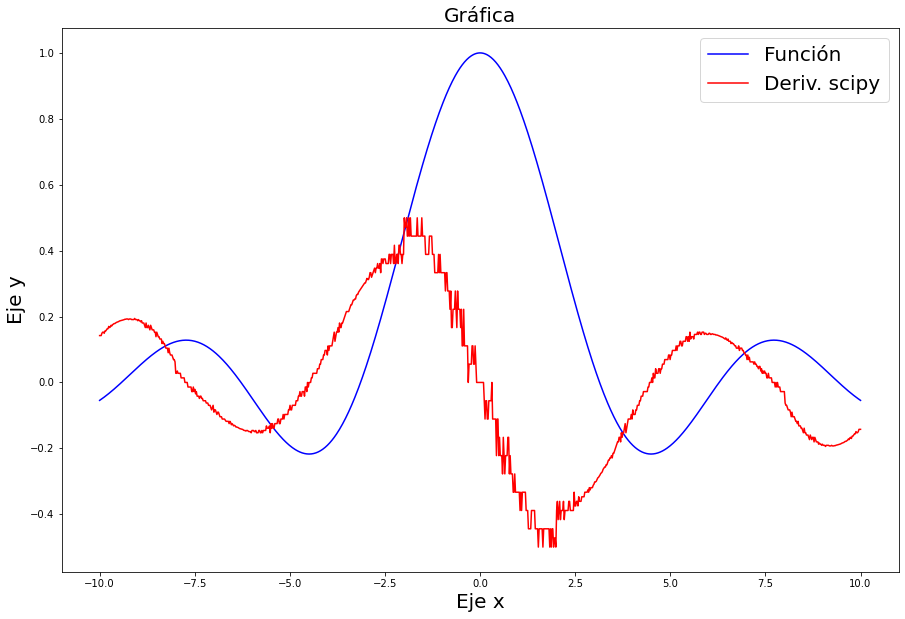

In [50]:
f_prima_scipy_2 = derivative(funcion, x, dx=1e-15, n=1) # Notar que se cambió el valor de dx a uno mucho más pequeño.

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x,f_prima_scipy_2, color="red", label="Deriv. scipy") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

De forma que graficando la derivada podemos estimar a través de prueba y error el valor de dx necesario para que no se presenten inestabilidades como las que se observan en la gráfica anterior.

Podemos aplicar también el mismo proceso para obtener derivadas de ordenes superiores, solamente cambiando el parámetro n dentro de derivative():

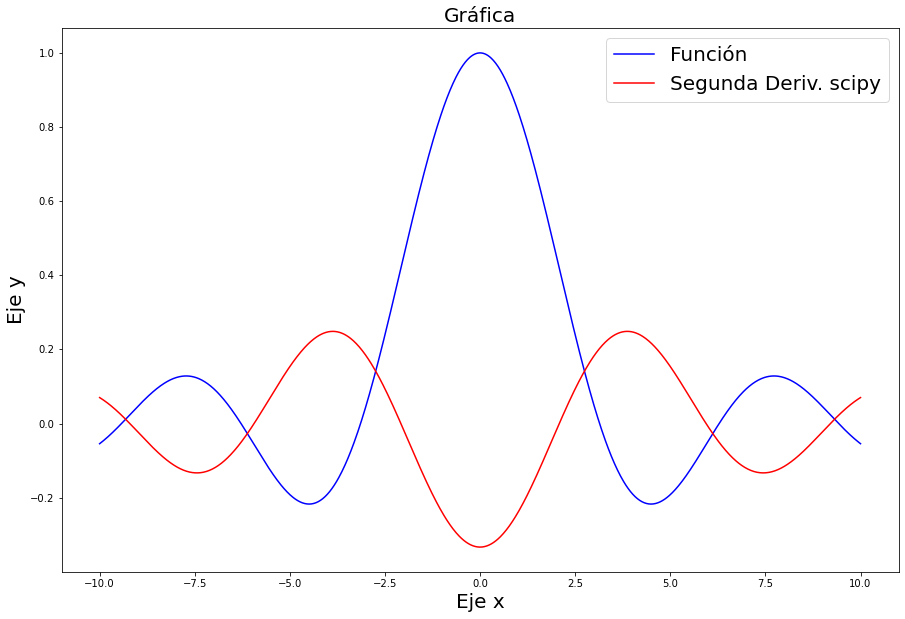

In [51]:
f_2prima_scipy = derivative(funcion, x, dx=1e-5, n=2) # Notar que se puso n=2.


figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x,f_2prima_scipy, color="red", label="Segunda Deriv. scipy") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

### numpy: 

Para obtener la derivada en numpy se puede usar la función np.diff(x), con x un array. Esta función calcula la resta entre un elemento del array y su vecino inmediatamente anterior, algo igual a la Forward Difference. Para obtener la derivada se hace lo siguiente:

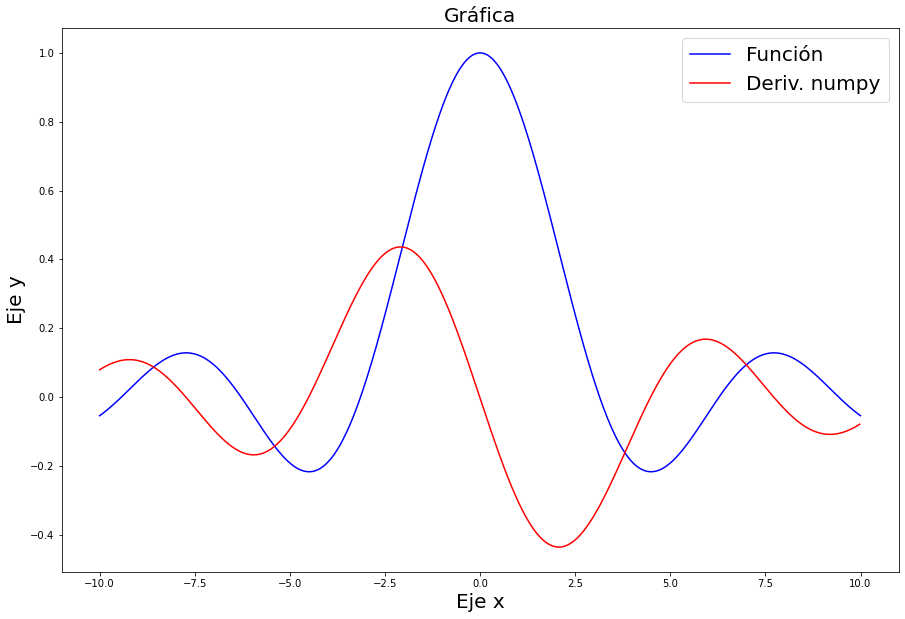

In [52]:
f_prima_numpy = np.diff(f)/np.diff(x) # hallamos la derivada haciendo uso de np.diff(). Lo que se calcula es básicamente Delta f/Delta x para todos los puntos de los arrays f y x. 

figure = plt.figure(figsize=(15,10))
plt.plot(x,f,color="blue", label="Función") # Graficamos la función
plt.plot(x[:-1],f_prima_numpy, color="red", label="Deriv. numpy") # Al igual que en la derivada con Forward difference, no graficamos con "x" sino con x[0:-1]
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

## Anotaciones finales para derivadas:

Los primeros métodos (forward, backward, central y segunda derivada), que fueron ejecutados manualmente, asumen que los valores del array x son equidistantes, es decir, que el valor de  h= x\[i+1\] - x\[i\] para cualquier i es el mismo. Sin embargo puede que en algunos conjuntos de datos este requisito no se cumpla, de forma que el método ideal en esos casos sería usar scipy (en cuanto exista una función ya definida y no simplemente nos den los arrays de $x$ y $y$) o incluso numpy. 

## Aplicación interesante con interpolación:

Supongamos que nos dan el siguiente conjunto de datos y queremos hallar su derivada usando diferencia central:

In [53]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.array([1,3,4,6,7,10])
y = np.array([1,9,16,36,49,100]) # Fijarse como y=x^2...pero haremos caso omiso de esto por el momento

El problema al momento de tratar de usar el método de diferencia central explicado en principio es que se asume que $h = x[i+1] - x[i]$ es igual para todo valor del índice i, pero si nos fijamos esto no ocurre: $x[1] - x[0] = 2,\, x[2] - x[1] = 1,\, x[3]- x[2] = 2,\, x[4]-x[3] = 1,\, x[5]-x[4]=3$. Así que ¿qué podemos hacer? ¡Podemos crear más puntos a través de una interpolación! 

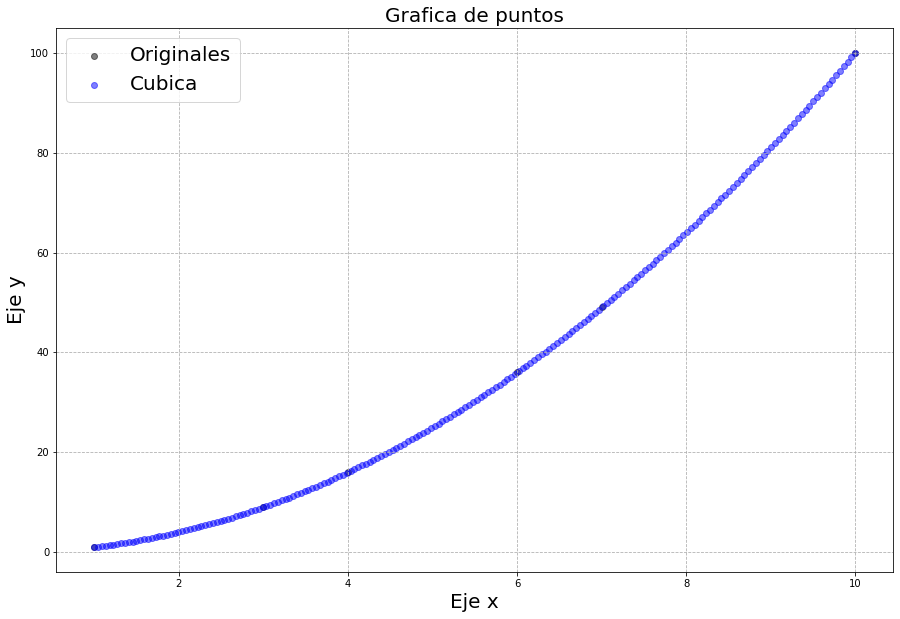

<Figure size 432x288 with 0 Axes>

In [54]:
from scipy.interpolate import interp1d # Importamos la clase interp1d que nos ayudará a hacer las interpolaciones

f3 = interp1d(x, y, kind='cubic') # Creamos una función que nos permitirá obtener los nuevos puntos interpolados con interpolación cúbica 

x_nuevo = np.linspace(np.amin(x),np.amax(x),200) # Obtenemos un nuevo array de valores en x con 200 puntos interpolados, cuyo minimo será el mínimo del array "x" y su máximo el máximo de "x". La función np.linspace() nos permite obtener puntos equidistantes, como lo queremos 

y_nuevo = f3(x_nuevo) # Hacemos uso de f3 para obtener los respectivos valores de y

figura = plt.figure(figsize=(15,10)) # Quiero que mi lienzo tenga tamaño de 15x10 unidades de Python
plt.grid(b=True, linestyle="--") # Dibujamos una rejilla cuyas lineas son del estilo --
plt.scatter(x,y,color="black", alpha=0.5, label="Originales") # Graficamos los puntos, de color negro, con una transparencia de alpha=0.5
plt.scatter(x_nuevo,y_nuevo,color="blue", alpha=0.5, label="Cubica") # Graficamos los nuevos 200 puntos
plt.xlabel("Eje x", fontsize=20) # Titulos de los ejes y la grafica
plt.ylabel("Eje y", fontsize=20)
plt.title("Grafica de puntos", fontsize=20)
plt.legend(fontsize=20) # Exigimos que se dibuje el cuadro de leyenda
plt.show() 
plt.clf()

Ahora si con un array de valores de $x$ equidistantes podemos hacer la derivada con diferencia central:

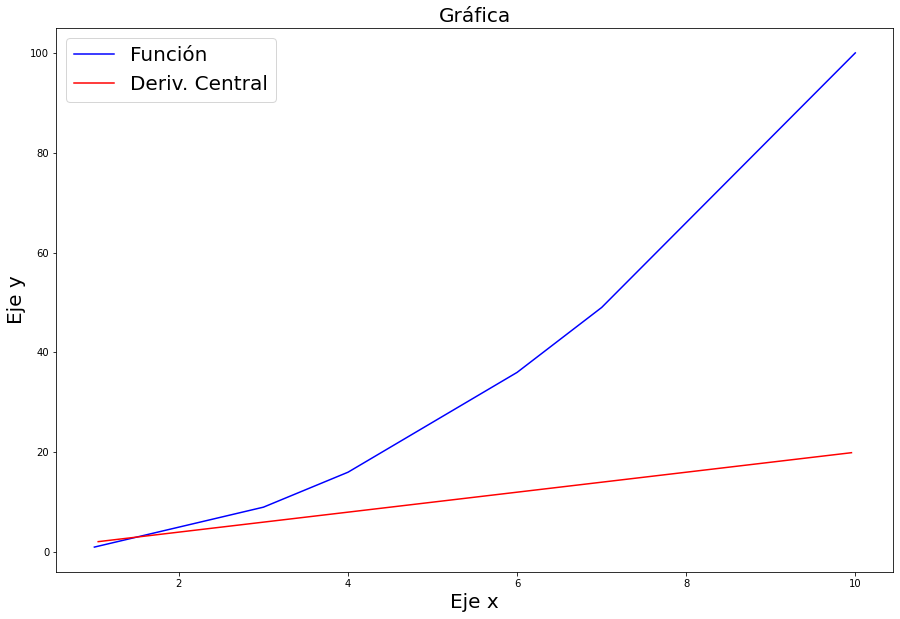

In [55]:
h = x_nuevo[1] - x_nuevo[0]
y_prima_central = (y_nuevo[2:] - y_nuevo[:-2])/(2*h) 

figure = plt.figure(figsize=(15,10))
plt.plot(x,y,color="blue", label="Función") # Graficamos la función
plt.plot(x_nuevo[1:-1], y_prima_central, color="red", label="Deriv. Central") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Gráfica", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Ahora miremos qué tan bien se compara la derivada numérica obtenida con la verdadera. Como se hizo en una anotación al cerar el array $y$, es claro que $y=x^2$, por lo que la derivada debería ser $y'=2x$...

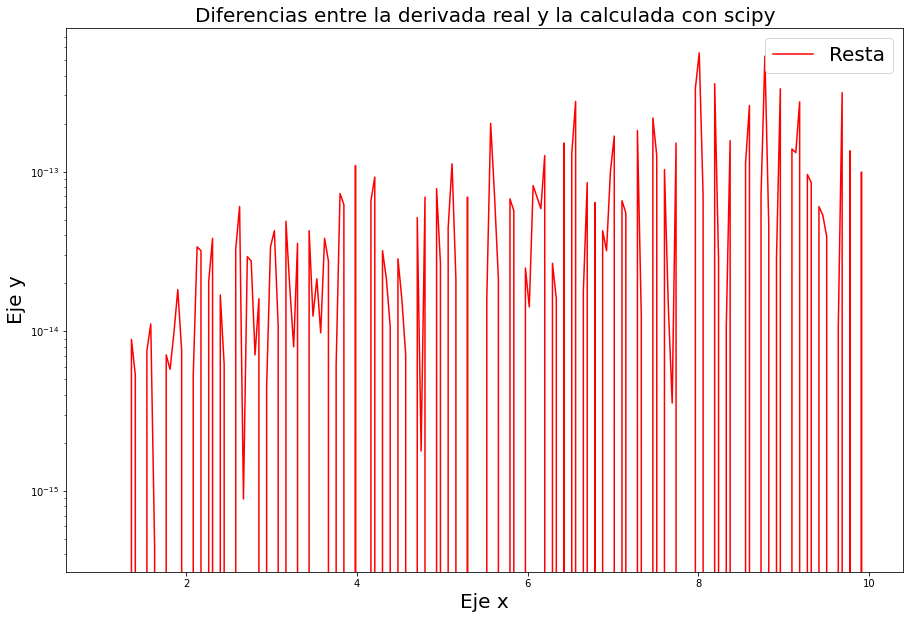

In [56]:
y_prima_verdadero = 2*x_nuevo[1:-1] # Creamos el valor verdadero de la derivada. Usamos en vez de x_nuevo el valor de x_nuevo[1:-1] ya que la derivada que hallamos numéricamente solo está definida para estos valores del eje x

resta_ejemplo = y_prima_verdadero - y_prima_central # Encontramos la diferencia entre la derivada real y la calculada numéricamente


figure = plt.figure(figsize=(15,10))
plt.plot(x_nuevo[1:-1],resta_ejemplo,color="red", label="Resta") 
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title("Diferencias entre la derivada real y la calculada con interpolación", fontsize=20)
plt.yscale("log") # La escala logaritmica en este caso nos permite ver más o menos en qué orden de magnitud están las restas de los valores reales y las derivadas calculadas numéricamente.  
plt.legend(fontsize=20)
plt.show()

Como se puede ver, las diferencias entre la derivada numérica y la verdadera son del orden de $10^{-12}$, que pueden ser despreciables!

# Integrales

## Integral de Riemann: Aproximación mediante rectángulos

Ahora siguen las integrales y el primer método que revisaremos para obtener una integral numéricamente es el de la integral de Riemann. Supongamos que queremos hallar la integral de una función $f=f(x)$. En este caso, dividimos el intervalo de integración $a\leq x \leq b$ en $N$ puntos distintos $\{x_i\}_{0\leq i \leq N-1}$, de forma que la distancia entre un punto y otro es $h = (b-a)/N$ si consideramos que los puntos $\{x_i\}$ son equidistantes. Con esta división en intervalos, podemos aproximar el área bajo una curva como una suma del área de un conjunto de rectángulos de ancho $h$ centrados en cada uno de los intervalos determinados por un punto $x_i$ y su vecino $x_{i+1}$ y de altura $f(x_i)$. Es decir $$\int_{a}^{b}f(x)\, dx \approx \sum_{i=0}^{N-1} f(x_i)h.$$ Miremos cómo puede un área bajo la curva aproximarse a través del área de estos rectángulos. Supongamos que queremos integrar la función que definimos al principio de este cuaderno entre $x=-10$ y $x=10$:

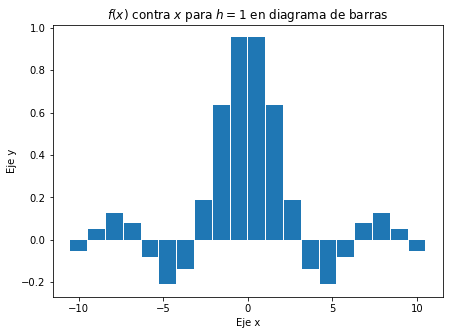

<Figure size 432x288 with 0 Axes>

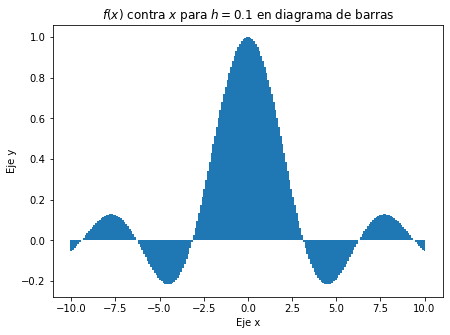

<Figure size 432x288 with 0 Axes>

In [57]:
# Definimos los límites de la integral
a = -10
b = 10 

h = 1 # Tomemos un valor de h arbitrario
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_1 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_1 = funcion(x_1) # Usamos la función definida al principio de este cuaderno.

figura = plt.figure(figsize=(7,5))
plt.bar(x_1,f_1, width=h) # Graficamos la fucnión f(x) pero como barras, de ancho h.
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"$f(x)$ contra $x$ para $h=1$ en diagrama de barras")
plt.show()
plt.clf()

h=0.1 # Las barras son muy anchas y no aproximan bien la función...hagámolas menos anchas
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_2 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_2 = funcion(x_2) # Usamos la función definida al principio de este cuaderno.

figura = plt.figure(figsize=(7,5))
plt.bar(x_2,f_2, width=h) # Graficamos la fucnión f(x) pero como barras, de ancho h.
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"$f(x)$ contra $x$ para $h=0.1$ en diagrama de barras")
plt.show()
plt.clf()

Nos damos cuenta que, a medida que $h$ tiende a ser cero, las barras en los diagramas tienden más a ajustarse a la forma de la función, de forma que a medida que $h \to 0$, la integral de la función se puede aproximar aún mejor a la suma del área de las barras. Con esto en mente, podemos encontrar la integral, según lo visto anteriormente, haciendo lo siguiente:

In [58]:
h=0.0001 # Este valor de h es lo suficientemente pequeño, dejémoslo
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_3 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_3 = funcion(x_3) # Usamos la función definida al principio de este cuaderno.

integral = np.sum(f_3*h) # hacemos la suma de los valores de f(x_i)*h

print(integral) # Se imprime el valor de la integral

3.316673164619918


La integral nos dio, según este método de aproximación: $$\int_{-10}^{10}\frac{\sin(x)}{x}\, dx \approx 3.316673164619918.$$ El verdadero valor de la integral es $$\int_{-10}^{10}\frac{\sin(x)}{x}\, dx \approx 3.3167,$$ de forma que este método aproximó bien (por lo menos a tres cifras decimales) el valor de la integral.

## Aproximación mediante trapecios:

También se puede hacer una aproximación no mediante rectángulos sino trapecios. A continuación se muestra de forma gráfica cómo se puede lograr:

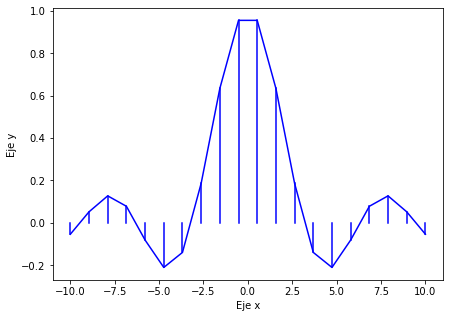

<Figure size 432x288 with 0 Axes>

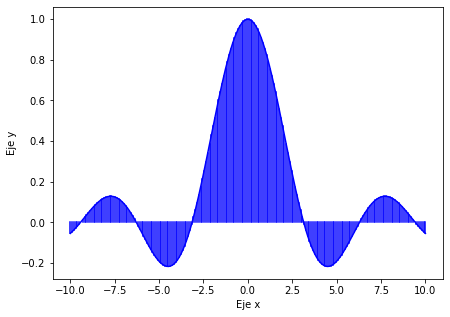

<Figure size 432x288 with 0 Axes>

In [59]:
h = 1 # h arbitrario
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_1 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_1 = funcion(x_1) # Usamos la función definida al principio de este cuaderno.

figura = plt.figure(figsize=(7,5))
plt.plot(x_1,f_1, color="blue") # Graficamos la función (plt.plot() grafica una línea contínua uniendo los puntos (x,y) mediante rectas)

for punto_x, punto_f in zip(x_1,f_1):
    plt.plot([punto_x, punto_x], [0.0, punto_f], color='blue') # Rutina para dibujar las líneas verticales dentro de la gráfica

plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
plt.clf()

h = 0.1 # h más pequeño
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_2 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_2 = funcion(x_2) # Usamos la función definida al principio de este cuaderno.

figura = plt.figure(figsize=(7,5))
plt.plot(x_2,f_2, color="blue") # Graficamos la función (plt.plot() grafica una línea contínua uniendo los puntos (x,y) mediante rectas)

for punto_x, punto_f in zip(x_2,f_2):
    plt.plot([punto_x, punto_x], [0.0, punto_f], color='blue') # Rutina para dibujar las líneas verticales dentro de la gráfica

plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
plt.clf()

En este caso en el que usan trapecios la suma de Riemann cambia ligeramente a $$\int_{a}^{b}f(x)\, dx \approx \sum_{i=0}^{N-1}f(x_i) h_i,$$ donde $h_i=h/2$ si $i=0$ o $i=N-1$ y $h_i=h$ para cualquier otro valor de i. Observemos cómo se implementa:

In [60]:
h=0.0001 # Este valor de h es lo suficientemente pequeño, dejémoslo
N = int((b-a)/h) # Encontramos N, el número de puntos (que debe ser un número entero)

x_3 = np.linspace(a,b,N) # Creamos N valores de x desde -10 hasta 10, equidistanciados. 
f_3 = funcion(x_3) # Usamos la función definida al principio de este cuaderno.

h_i = h*np.ones(N) # Creamos un array de longitud N donde todos los elementos son h*1 = h. Este array representa todos los valores de h_i
h_i[0] = h/2 # Hacemos el primer y último valor de h_i igual a h/2, como se explicó anteriormente
h_i[-1] = h/2

integral = np.sum(f_3*h_i) # hacemos la suma de los valores de f(x_i)*h

print(integral) # Se imprime el valor de la integral

3.316678604831027


El valor encontrado por este método, aunque es bastante parecido al obtenido con el método de rectángulos, se acerca un poco más al valor real de la integral. También esta regla de trapecios puede ser implementada a través de scipy de la siguiente manera:

In [61]:
from scipy.integrate import trapz

integral = trapz(f_3,x_3) # Con al función trapz, basta con poner los valores de f y x para poder realizar la integral mediante el método de trapecios

print(integral) # Se imprime el valor de la integral

3.3166951883069684


Esta función reporta incluso un valor más exacto de la integral a comparación del método de trapecios hecho a mano, ya que la función está optimizada justamente para este fin. En esta función de scipy no se usa explícitamente la fórmula que implementamos a mano, sino que usa las fórmulas de Newton-Coates para aproximar la integral. 

## Aproximación mediante parábolas: Regla de Simpson

En el caso de la regla de trapecios usábamos "rectángulos" en los cuales su parte superior (o techo) no se mantenía horizontal como un rectángulo normal sino que era remplazada por una línea recta, formada entre dos puntos $f(x_i)$ y $f(x_{i+1})$. En el caso de la regla de Simpson ya no se usa como "techo" una recta sino una parábola, formada por los puntos $f(x_{i-1}), f(x_i)$ y $f(x_{i+1})$. Esto tiene como resultado que los valores de $h_i$ sean $h_i = \frac{h}{3}, \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}, \frac{2h}{3}, ..., \frac{4h}{3}, \frac{2h}{3}, \frac{h}{3}$.  El proceso a este punto se vuelve un poco más complicado, pero afortunadamente scipy ya implementa la integración mediante el método de Simpson de la siguiente forma:

In [62]:
from scipy.integrate import simps

integral = simps(f_3,x_3) # Con la función simps, basta con poner los valores de f y x para poder realizar la integral mediante el método de Simpson

print(integral) # Se imprime el valor de la integral

3.3166951884377536


## Aclaraciones: 

En principio los valores de los arrays que simbolizaban a $x$ y $f(x)$ dependían del valor de $h$, ya que este determinaba el número de puntos $N$. Sin embargo, para usar las funciones de scipy *trapz* y *simps* no es necesario definir un valor de $h$ explícito sino que con tener los arrays "x" y "f" es más que suficiente. Por ejemplo, supongamos que tenemos los siguientes puntos:

In [63]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import simps
from scipy.integrate import trapz

x = np.array([1,3,4,6,7,10])
y = np.array([1,9,16,36,49,100]) # Fijarse que y=x^2

La integral de la función y(x) determinada por el array "y" en todo el dominio dado por el array "x" (de 1 a 10) se puede hallar como:

In [64]:
integral_simp = simps(y,x) # Método de Simpson
integral_trapz = trapz(y,x) # Método de Trapecios

print(integral_simp) # Imprimimos los valores de la integral mediante método de Simpson y trapecios 
print(integral_trapz)

335.91666666666663
340.5


Si nos fijamos, los valores del array "y" están determinados por $y=x^2$. Esto quiere decir que el valor verdadero de la integral es: $$\int_{1}^{10}y(x)\, dx = \int_{1}^{10}x^2\, dx = \frac{x^3}{3}\Big|_{1}^{10} = \frac{10^3}{3} - \frac{1^3}{3} = 333$$

Los valores de las integrales halladas numéricamente estuvieron cerca del valor real, pero no son tan exactos. Algo que podemos hacer para mejorar esto es crear más puntos (x,y) a través de interpolación, dado que tal vez la cantidad de puntos no es la suficiente para poder aproximar la función $y(x) = x^2$ correctamente. Intentemos con 1000 puntos hallados mediante interpolación:

In [65]:
from scipy.interpolate import interp1d # Importamos la clase interp1d que nos ayudará a hacer las interpolaciones

f3 = interp1d(x, y, kind='cubic') # Creamos una función que nos permitirá obtener los nuevos puntos interpolados con interpolación cúbica 

x_nuevo = np.linspace(np.amin(x),np.amax(x),1000) # Obtenemos un nuevo array de valores en x con 1000 puntos interpolados, cuyo minimo será el mínimo del array "x" y su máximo el máximo de "x".

y_nuevo = f3(x_nuevo) # Hacemos uso de f3 para obtener los respectivos valores de y

integral_simp = simps(y_nuevo,x_nuevo) # Método de Simpson
integral_trapz = trapz(y_nuevo,x_nuevo) # Método de Trapecios

print(integral_simp) # Imprimimos los valores de la integral mediante método de Simpson y trapecios 
print(integral_trapz)

333.00000012186524
333.00012174336496


Como observamos, usando un conjunto de puntos mucho más grande pudimos obtener un valor mucho más cercano al real. Esto muestra que, aunque podamos hallar un valor aproximado de la integral de un conjunto de datos pequeño, siempre es mejor tener una cantidad lo suficientemente grande como para poder acercarnos al valor real. Es algo similar a lo que ocurre con mediciones tomadas en un laboratorio: Entre más datos, más certeza podremos tener de que una medida converge a cierto valor esperado.   

La interpolación permite dar un valor agregado al proceso de integración y es que no solo podremos integrar en todo el dominio dado por los valores del array "x" (en este caso de 1 a 10), sino que podemos integrar en otros dominios. Supongamos que queremos hacer la integral de este ejemplo pero ya no de 1 a 10 sino de 2 a 3:

In [66]:
x_nuevo_2 = np.linspace(2,3,1000) # Obtenemos un nuevo array de valores en x con 1000 puntos interpolados, cuyo minimo será el mínimo del intervalo de integración y su máximo el máximo de dicho intervalo. 

y_nuevo_2 = f3(x_nuevo_2) # Hacemos uso de f3 para obtener los respectivos valores de y en este nuevo dominio

integral_simp = simps(y_nuevo_2,x_nuevo_2) # Método de Simpson
integral_trapz = trapz(y_nuevo_2,x_nuevo_2) # Método de Trapecios

print(integral_simp) # Imprimimos los valores de la integral mediante método de Simpson y trapecios 
print(integral_trapz)

6.333333333500504
6.333333500333838


El valor verdadero de la integral es $$\int_{2}^{3}y(x)\, dx = \int_{2}^{3}x^2\, dx = \frac{x^3}{3}\Big|_{2}^{3} = \frac{3^3}{3} - \frac{2^3}{3} = \frac{19}{3} \approx 6.3333,$$ de forma que vemos que el valor de las integrales numéricas coincide con el valor real nuevamente.

## Integrales de funciones determinadas en varias dimensiones:

En los casos anteriores mediante *simps* y *trapz* pudimos hallar la integral de un conjunto de datos ya dado. Sin embargo scipy también brinda una forma de realizar integrales de funciones solo mediante la definición de estas mediante la clase *nquad*. Por ejemplo, supongamos que queremos hallar al siguiente integral: $$\int_{1}^{2} \frac{e^{-x}}{x}\, dx.$$ Esta integral se puede realizar de la siguiente forma:

In [67]:
from scipy.integrate import nquad

def funcion(x): # Creamos la función que vamos a integrar
    return np.exp(-x)/x

def limites_x(): # Creamos una función que retorna una lista con los límites de integración
    return [1,2]

integral, error_absoluto = nquad(funcion, [limites_x]) # Con nquad obtenemos el valor de la integral y el error asociado a esta cantidad. Los parámetros de entrada son la función a integrar y una lista con la función que retorna los límites de integración

print(integral)

0.17048342368745917


El valor teórico de la integral es: $$\int_{1}^{2}\frac{e^{-x}}{x}\, dx \approx 0.170483$$ y como podemos observar el valor de la integral hallado numéricamente es igual!

También podemos hacer dobles integrales con *nquad*. Supongamos que queremos hallar la siguiente integral: $$\int_{y=0}^{1/2}\int_{x=0}^{1-2y} xy\, dx dy = \frac{1}{96} \approx 0.010416666.$$ Podemos hacer la integral de la siguiente manera:

In [68]:
from scipy.integrate import nquad

def funcion(x,y): # Creamos la función que vamos a integrar
    return x*y

def limites_x(y): # Creamos una función que retorna una lista con los límites de integración en x
    return [0,1-2*y]

def limites_y(): # Creamos una función que retorna una lista con los límites de integración en y
    return [0,1/2] 

integral, error_absoluto = nquad(funcion, [limites_x, limites_y]) # Con nquad obtenemos el valor de la integral y el error asociado a esta cantidad. Los parámetros de entrada son la función a integrar y una lista con las funciones que retornan los límites de integración en cada variable. Primero se colocan los límites de la integral más interna y luego vamos colocando los límites hasta ir a la integral más externa. En este caso la más interna es la integral sobre x y la siguiente es sobre y 

print(integral)

0.010416666666666668


Como vemos, el valor encontrado es igual al valor real de la integral. El proceso se puede extender a triples integrales o incluso a ordenes superiores, mostrando que *nquad* es una de las herramientas más útiles que tiene scipy. 

## Obteniendo la antiderivada de una función

En los procesos anteriores solo hallamos la integral de una función, pero no su antiderivada. Se entiende por antiderivada de $f(x)$ a la función $F(x)$ tal que $$\int f(x)\, dx = F(x) + C,$$con C una constante. Dado que $C$ puede tomar infinitos valores posibles, la anterior fórmula no nos puede ayudar a determinar bien la función $F(x)$. Algo que podemos hacer para determinarla bien es recurrir al Teorema Fundamental del Cálculo: $$\int_{a}^{x} f(x')\,dx' = F(x) - F(a).$$ Así, sabiendo cuánto vale la antiderivada en un punto $a$ (condición inicial), puedo conocer la antiderivada en cualquier punto $x$: $$F(x) = F(a) + \int_{a}^{x}f(x´)\,dx'.$$Implementemos esto con lo que ya sabemos. 

Supongamos que queremos encontrar la antiderivada de $f(x) = \frac{2}{\sqrt{\pi}}e^{-x^2}$, sabiendo que $F(0)=0$ y queremos encontrarla para $-3 \leq x \leq 3$

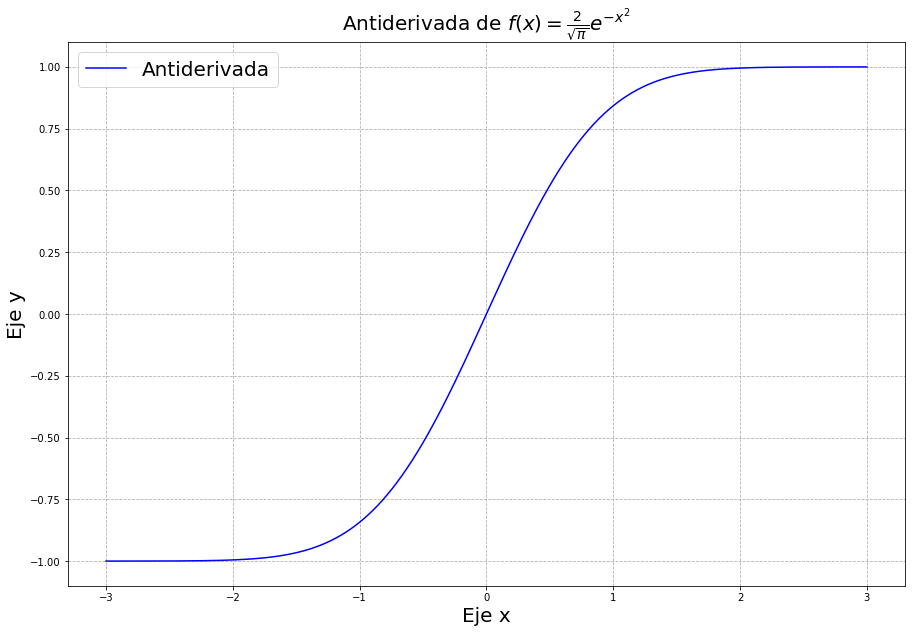

In [69]:
from scipy.integrate import nquad

def funcion(x): # Creamos la función que vamos a antiderivar
    return (2/(np.sqrt(np.pi)))*np.exp(-x**2)

def limites_x(x): # Creamos una función que retorna una lista con los límites de integración. El límite inferior es cero dado que ya conocemos el valor de F(0). Elegimos a=0 por conveniencia
    return [0,x]

x = np.linspace(-3,3,1000) # Creamos un array de 1000 valores entre -3 y 3, que representarán los posibles valores de x
F = [] # Creamos una lista que contendrá los valores de la antiderivada F(x)

for i in x: # Recorremos los valores del array "x"
    integral, error_absoluto = nquad(funcion, [limites_x(i)])
    F.append(0 + integral) # A la lista F agregamos el valor de F(x) = F(a) + int f(x') dx'
    
F = np.array(F) # Convertimos a F en un array

# Graficamos...
figure = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.plot(x, F, color="blue", label="Antiderivada") # Graficamos la función
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title(r"Antiderivada de $f(x) = \frac{2}{\sqrt{\pi}}e^{-x^2}$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Esta función se conoce como función error o $erf(x)$. Scipy ya implementa directamente esta función error. Comparemos los resultados que obtuvimos nosotros con los que podemos obtener de Scipy: 

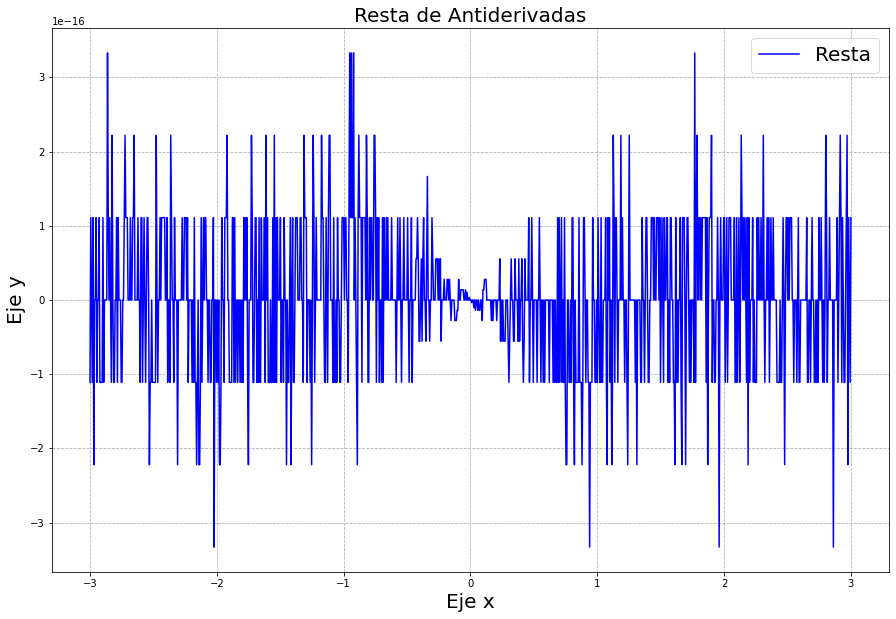

In [70]:
from scipy.special import erf # Importamos la función error

F_2 = erf(x) # Usamos la función que acabamos de importar

resta_resultados = F_2 - F # Obtenemos el resultado de la resta de los resultados hallados con Scipy y los que obtuvimos.

figure = plt.figure(figsize=(15,10))
plt.plot(x,resta_resultados,color="blue", label="Resta") # Graficamos la función
plt.xlabel("Eje x", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title(r"Resta de Antiderivadas", fontsize=20)
plt.grid(b=True, linestyle="--")
plt.legend(fontsize=20)
plt.show()

Como vemos, la resta de ambos resultados es del orden de $10^{-16}$, lo cual muestra que lo que hallamos nosotros a mano se encuentra muy cerca a lo que reporta Scipy con la implementación de la función error. El resultado obtenido a mano está bastante bien!

## Otro ejemplo: Convolución de dos funciones

Otro ejemplo en el que podemos hacer uso de la implementación anterior es el de encontrar la convolución entre dos funciones. La convolución $(f*g)(t)$ de dos funciones $f(x)$ y $g(x)$ se puede encontrar como: $$(f*g)(t) = \int_{-\infty}^{\infty} f(x)g(t-x)\, dx.$$ Vamos a usar un código similar al que usamos antes para encontrar la función error pero esta vez apra encontrar la convolución entre dos funciones. Supongamos que  $f(x) = 0$ si $x \leq -0.5$ y si $x \geq 0.5$, $f(x)=1$ si $-0.5<x<0.5$, $g(x)=0$ si $x<0$ y $g(x)=5e^{-x}$ si $x \geq 0$.  También supongamos que queremos encontrar la convolución entre las dos funciones para $$-10 \leq t \leq 10.$$ A continuación se implementará esto.

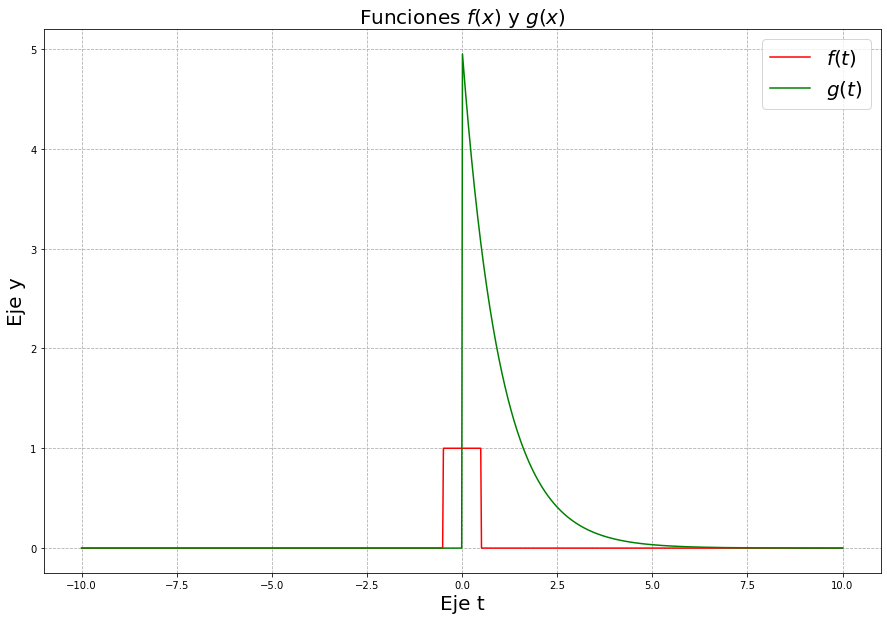

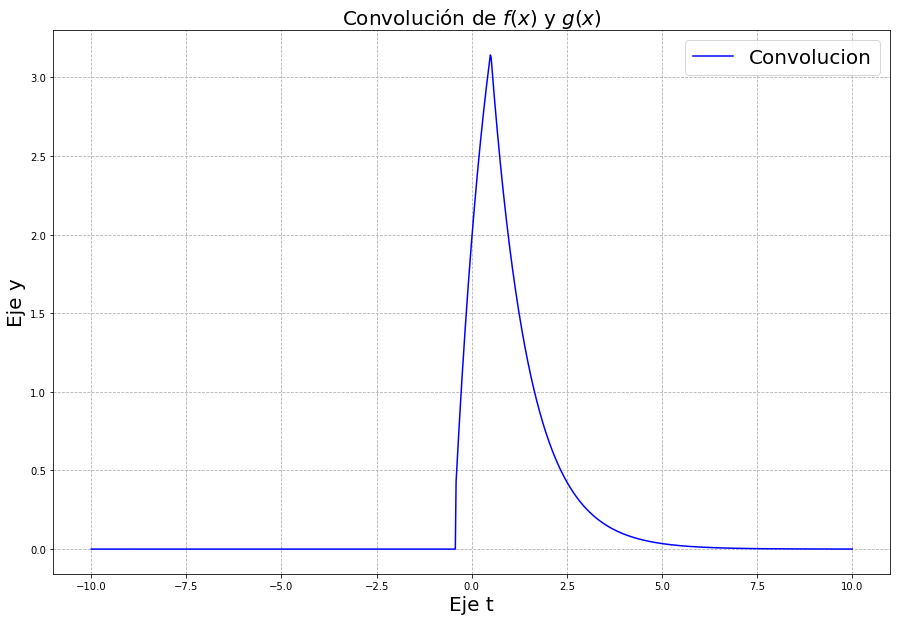

In [72]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import nquad


############################################## Parte donde encontramos la convolución ########################################################

def f(x): # Creamos la funcion f(x)
    if(x <= -0.5):
        return 0
    elif(x>-0.5 and x<0.5):
        return 1
    else:
        return 0

def g(x): # Creamos la funcion g(x)
    if(x < 0):
        return 0
    else:
        return 5*np.exp(-x)

def funcion(x,t): # Creamos la función que vamos a integrar
    return f(x)*g(t-x)

t = np.linspace(-10,10,1000) # Creamos un array de 1000 valores entre -10 y 10, que representarán los posibles valores de t.
Convolucion = [] # Creamos una lista que contendrá los valores de la convolucion

for i in t: # Recorremos los valores del array "t"
    integral, error_absoluto = nquad(funcion, [[-np.inf,np.inf]], args=([i]) ) # Hallamos la integral para un valor especifico de t. Como se observa, en caso de que los límites sean valores fijos, como -infinito o infinito, podemos poner los límites de integración directamente. Si la función que integraremos tiene variables extra aparte de las variables de integración (en este caso la variable de integración es x y la variable extra es t), ponemos estos parámetros extra en args=() (Los parámetros extra van dentro del paréntesis circular y el cuadrado)
    Convolucion.append(integral) # A la lista "Convolucion" agregamos el valor de (f*g)(t)
    
Convolucion = np.array(Convolucion) # Convertimos a "Convolucion" en un array

########################################### Parte de graficas ###############################################

# Así como obtuvimos la convolución para cada valor de t, necesitamos hallar el valor de las funciones f y g para cada valor de t si las queremos graficar. Esto no hace parte de la convolución (esa ya se hizo arriba, es solo para poder graficar las funciones f y g)
funcion_f = [] 
funcion_g = []

for i in t:
    funcion_f.append(f(i)) # Obtenemos cada valor de la función f para cada valor específico de t
    funcion_g.append(g(i))


# Graficamos las funciones
figure = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.plot(t, funcion_f, color="red", label=r"$f(t)$") # Graficamos la función f
plt.plot(t, funcion_g, color="green", label=r"$g(t)$") # Graficamos la función g
plt.xlabel("Eje t", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title(r"Funciones $f(x)$ y $g(x)$", fontsize=20)
plt.legend(fontsize=20)
plt.show()


# Graficamos la convolución
figure = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
plt.plot(t, Convolucion, color="blue", label="Convolucion") # Graficamos la función
plt.xlabel("Eje t", fontsize=20)
plt.ylabel("Eje y", fontsize=20)
plt.title(r"Convolución de $f(x)$ y $g(x)$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

Algo similar a lo que ocurre en esta convolución se muestra en este gif: https://es.wikipedia.org/wiki/Convoluci%C3%B3n#/media/Archivo:Convolucion_de_entrada_con_respuesta_al_impulso.gif . 

Esta forma de hacer una convolución no es la mejor, ya que podemos aprovechar las propiedades de la transformada de Fourier para obtener el mismo resultado. Sin embargo es una forma directa de hacerlo a partir de la definición.